# Objective

The purpose of this analysis is to take a look at all previous Turkish GP race lap times, and visualize race pace trends across different years (2005 to 2011) for the drivers that has driven for each current constructor.

Data Source:
- Ergast Developer API: https://ergast.com/mrd/

## Table of Content:

* [Data Preparation](#Section1)
    * [Import data](#section_1_1)
    * [Create look-up table for constructors](#section_1_2)
    * [Create look-up tables for drivers](#section_1_3)
    * [Link each lap time to a constructor](#section_1_4)
    * [Merge each race into a master data set](#section_1_5)
* [Data Visualization - Driver Race Pace EDA](#Section2)
    * [Create regular lap time data frame](#section_2_1)
    * [Ferrari Race Pace Plots](#section_2_2)
    * [McLaren Race Pace Plots](#section_2_3)
    * [Red Bull Race Pace Plots](#section_2_4)
    * [Renault Race Pace Plots](#section_2_5)
    * [Williams Race Pace Plots](#section_2_6)
    * [Toro Rosso Race Pace Plots](#section_2_7)
    * [Honda + Brawn + Mercedes Race Pace Plots](#section_2_8)
    * [Skyper + Force India Race Pace Plots](#section_2_9)
    * [Sauber + BMW Sauber Race Pace Plots](#section_2_10)

## Data Preparation <a class="anchor" id="Section1"></a>

In [1]:
import pandas as pd
import numpy as np

### Import Data <a class="anchor" id="section_1_1"></a>

In [2]:
laps_master = pd.read_csv('data/lap_times.csv')
races_master = pd.read_csv('data/races.csv')
quali_master = pd.read_csv('data/qualifying.csv')
drivers_master = pd.read_csv('data/drivers.csv')
constructors_master = pd.read_csv('data/constructors.csv')
results_master = pd.read_csv('data/results.csv')
circuits_master = pd.read_csv('data/circuits.csv')

In [3]:
races_master[races_master.name == "Turkish Grand Prix"].sort_values(by='year')

,raceId,year,round,circuitId,name,date,time,url
83,84,2005,14,5,Turkish Grand Prix,2005-08-21,15:00:00,http://en.wikipedia.org/wiki/2005_Turkish_Gran...
65,66,2006,14,5,Turkish Grand Prix,2006-08-27,15:00:00,http://en.wikipedia.org/wiki/2006_Turkish_Gran...
46,47,2007,12,5,Turkish Grand Prix,2007-08-26,12:00:00,http://en.wikipedia.org/wiki/2007_Turkish_Gran...
21,22,2008,5,5,Turkish Grand Prix,2008-05-11,12:00:00,http://en.wikipedia.org/wiki/2008_Turkish_Gran...
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
342,343,2010,7,5,Turkish Grand Prix,2010-05-30,11:00:00,http://en.wikipedia.org/wiki/2010_Turkish_Gran...
842,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,10:10:00,https://en.wikipedia.org/wiki/2020_Turkish_Gra...


In [4]:
laps_2005_df = laps_master[laps_master.raceId == 84]
laps_2006_df = laps_master[laps_master.raceId == 66]
laps_2007_df = laps_master[laps_master.raceId == 47]
laps_2008_df = laps_master[laps_master.raceId == 22]
laps_2009_df = laps_master[laps_master.raceId == 7]
laps_2010_df = laps_master[laps_master.raceId == 343]
laps_2011_df = laps_master[laps_master.raceId == 844]

### Create look-up table for constructors <a class="anchor" id="section_1_2"></a>

In [5]:
# constructors who participated in any Turkish GP 
# duplicate teams do show up, as when contruct. names change, a new ID is created
# Brawn has constructorId 23, while Mercedes 131

constructors = ["BAR", "Ferrari", "Jordan", "McLaren", "Minardi", "Red Bull", "Renault", "Sauber", 
                "Toyota", "Williams", "BMW Sauber", "Honda", "MF1", "Spyker MF1", "Super Aguri", 
                "Toro Rosso", "Spyker", "Force India", "Brawn", "HRT", "Lotus", "Mercedes", "Sauber", "Virgin"]

In [6]:
df_constructors = constructors_master[constructors_master['name'].isin(constructors)]
df_constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


In [7]:
constructor_lookup = pd.Series(df_constructors.constructorId.values, index=df_constructors.name).to_dict()
constructor_lookup

{'McLaren': 1,
 'BMW Sauber': 2,
 'Williams': 3,
 'Renault': 4,
 'Toro Rosso': 5,
 'Ferrari': 6,
 'Toyota': 7,
 'Super Aguri': 8,
 'Red Bull': 9,
 'Force India': 10,
 'Honda': 11,
 'Spyker': 12,
 'MF1': 13,
 'Spyker MF1': 14,
 'Sauber': 15,
 'BAR': 16,
 'Jordan': 17,
 'Minardi': 18,
 'Brawn': 23,
 'Mercedes': 131,
 'HRT': 164,
 'Virgin': 166,
 'Lotus': 205}

### Create look-up tables for drivers <a class="anchor" id="section_1_3"></a>

This is needed in order to link/connect each lap time done by a driver to the corresponding constructor, for analysis

We need to build this look up table for every year's race, as the drivers sitting in the car could change each year

In [8]:
# driver names taken from https://ergast.com/api/f1/2005/drivers
# constructor's drivers taken from https://ergast.com/api/f1/2005/14/constructors
# constructor's drivers taken from https://en.wikipedia.org/wiki/2005_Formula_One_World_Championship


driver2constr_2005 = {
    27 : "Minardi", # albers ---> int(drivers_master[drivers_master.driverRef == 'albers'].driverId)
    4 : "Renault",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Ferrari",  # barrichello
    18 : "BAR", # button
    14 : "Red Bull", # coulthard
    19 : "BAR", # davidson
    37 : "McLaren", # de la Rosa
    38 : "Minardi", # Doornbos
    21 : "Renault", # Fisichella
    40 : "Minardi", # Friesacher
    2 : "Williams", # Heidfeld
    39 : "Jordan", # karthikeyan
    32 : "Red Bull", # klien
    24 : "Red Bull", # liuzzi
    13 : "Sauber", # massa
    33 : "Jordan", #monteiro
    31 : "McLaren", #montoya
    42 : "Williams", #pizzonia
    8 : "McLaren", # raikonnen
    11 : "BAR", # sato
    30 : "Ferrari", # m_schumacher
    23 : "Toyota", # r_schumacher
    15 : "Toyota", #trulli
    35 : "Sauber", #villeneuve
    17 : "Williams", #webber
    25 : "McLaren", #wurz
    41 : "Toyota" #zonta
}

# constructors taken from https://ergast.com/api/f1/2006/14/constructors
# driver names taken from https://ergast.com/api/f1/2006/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2006_Formula_One_World_Championship

driver2constr_2006 = {
    27 : "MF1", # albers ---> int(drivers_master[drivers_master.driverRef == 'albers'].driverId)
    4 : "Renault",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Honda",  # barrichello
    18 : "Honda", # button
    14 : "Red Bull", # coulthard
    19 : "Honda", # davidson
    37 : "McLaren", # de la Rosa
    38 : "Red Bull", # Doornbos
    21 : "Renault", # Fisichella
    2 : "BMW Sauber", # Heidfeld
    32 : "Red Bull", # klien
    24 : "Toro Rosso", # liuzzi
    13 : "Ferrari", # massa
    33 : "MF1", #monteiro
    31 : "McLaren", #montoya
    8 : "McLaren", # raikonnen
    11 : "Super Aguri", # sato
    30 : "Ferrari", # m_schumacher
    23 : "Toyota", # r_schumacher
    15 : "Toyota", #trulli
    35 : "BMW Sauber", #villeneuve
    17 : "Williams", #webber
    25 : "Williams", #wurz
    3:  "Williams", #rosberg
    26 : "Toro Rosso", #speed
    34 : "Super Aguri", # ide
    29 : "Super Aguri", # yamamoto
    36 : "Super Aguri", # montagny
    9 : "BMW Sauber" # kubica
}

# constructors taken from https://ergast.com/api/f1/2007/12/constructors
# driver names taken from https://ergast.com/api/f1/2007/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2007_Formula_One_World_Championship

driver2constr_2007 = {
    27 : "Spyker MF1", # albers ---> int(drivers_master[drivers_master.driverRef == 'albers'].driverId)
    4 : "McLaren",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Honda",  # barrichello
    18 : "Honda", # button
    14 : "Red Bull", # coulthard
    19 : "Super Aguri", # davidson
    21 : "Renault", # Fisichella
    2 : "BMW Sauber", # Heidfeld
    32 : "Honda", # klien
    24 : "Toro Rosso", # liuzzi
    13 : "Ferrari", # massa
    8 : "Ferrari", # raikonnen
    11 : "Super Aguri", # sato
    23 : "Toyota", # r_schumacher
    15 : "Toyota", #trulli
    17 : "Red Bull", #webber
    25 : "Williams", #wurz
    3:  "Williams", #rosberg
    26 : "Toro Rosso", #speed
    9 : "BMW Sauber", # kubica
    29 : "Spyker MF1", # yamamoto
    6 : "Williams", #nakajima
    16 : "Spyker MF1", # sutil
    28 : "Spyker MF1", # winkelhock
    20 : "Toro Rosso", # vettel
    1 : "McLaren", # hamilton
    5 : "Renault" # kovalainen
}


# constructors taken from https://ergast.com/api/f1/2008/5/constructors
# driver names taken from https://ergast.com/api/f1/2008/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2008_Formula_One_World_Championship

driver2constr_2008 = {
    4 : "Renault",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Honda",  # barrichello
    18 : "Honda", # button
    14 : "Red Bull", # coulthard
    19 : "Super Aguri", # davidson
    12 : "Renault", # piquet jr.
    21 : "Force India", # fisichella
    2 : "BMW Sauber", # Heidfeld
    13 : "Ferrari", # massa
    8 : "Ferrari", # raikonnen
    11 : "Super Aguri", # sato
    10 : "Toyota", # glock
    15 : "Toyota", #trulli
    17 : "Red Bull", #webber
    3:  "Williams", #rosberg
    9 : "BMW Sauber", # kubica
    6 : "Williams", #nakajima
    16 : "Force India", # sutil
    20 : "Toro Rosso", # vettel
    1 : "McLaren", # hamilton
    5 : "McLaren", # kovalainen
    7 : "Toro Rosso" # bourdais
}

# constructors taken from https://ergast.com/api/f1/2009/7/constructors
# driver names taken from https://ergast.com/api/f1/2009/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2009_Formula_One_World_Championship


driver2constr_2009 = {
    4 : "Renault",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Brawn",  # barrichello
    18 : "Brawn", # button
    12 : "Renault", # piquet jr.
    154 : "Renault", # grosjean
    21 : "Force India", # fisichella
    24 : "Force India", # liuzzi
    2 : "BMW Sauber", # Heidfeld
    13 : "Ferrari", # massa
    69 : "Ferrari", # badoer
    8 : "Ferrari", # raikonnen
    10 : "Toyota", # glock
    15 : "Toyota", #trulli
    155 : "Toyota", #kobayashi
    17 : "Red Bull", #webber
    3:  "Williams", #rosberg
    9 : "BMW Sauber", # kubica
    6 : "Williams", #nakajima
    16 : "Force India", # sutil
    20 : "Red Bull", # vettel
    1 : "McLaren", # hamilton
    5 : "McLaren", # kovalainen
    7 : "Toro Rosso", # bourdais
    153 : "Toro Rosso", # alguersuari
    67 : "Toro Rosso" # buemi
}

# constructors taken from https://ergast.com/api/f1/2010/7/constructors
# driver names taken from https://ergast.com/api/f1/2010/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2010_Formula_One_World_Championship


driver2constr_2010 = {
     4 : "Ferrari",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Williams",  # barrichello
    18 : "McLaren", # button
    24 : "Force India", # liuzzi
    2 : "BMW Sauber", # Heidfeld
    13 : "Ferrari", # massa
    10 : "Virgin", # glock
    810 : "Virgin", # di Grassi
    15 : "Lotus", #trulli
    155 : "BMW Sauber", #kobayashi
    37 : "BMW Sauber", #de la Rosa
    17 : "Red Bull", #webber
    3: "Mercedes", #rosberg
    30: "Mercedes", #m_schumacher
    9 : "Renault", # kubica
    808 : "Renault", # petrov
    16 : "Force India", # sutil
    20 : "Red Bull", # vettel
    1 : "McLaren", # hamilton
    5 : "Lotus", # kovalainen
    153 : "Toro Rosso", # alguersuari
    67 : "Toro Rosso", # buemi
    811 : "HRT", # bruno senna
    812 : "HRT", # chandhok
    32 : "HRT", # klien
    29 : "HRT", # yamamoto
    807 : "Williams"# hulkenberg
}

# constructors taken from https://ergast.com/api/f1/2011/4/constructors
# driver names taken from https://ergast.com/api/f1/2011/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2011_Formula_One_World_Championship

driver2constr_2011 = {
     4 : "Ferrari",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Williams",  # barrichello
    813 : "Williams",  # maldonado
    18 : "McLaren", # button
    24 : "HRT", # liuzzi
    2 : "Renault", # Heidfeld
    13 : "Ferrari", # massa
    10 : "Virgin", # glock
    816 : "Virgin", # d'Ambrosio
    15 : "Lotus", #trulli
    155 : "Sauber", #kobayashi
    37 : "Sauber", #de la Rosa
    17 : "Red Bull", #webber
    3: "Mercedes", #rosberg
    30: "Mercedes", #m_schumacher
    811 : "Renault", # bruna senna
    808 : "Renault", # petrov
    16 : "Force India", # sutil
    814 : "Force India", # di Resta
    20 : "Red Bull", # vettel
    1 : "McLaren", # hamilton
    5 : "Lotus", # kovalainen
    153 : "Toro Rosso", # alguersuari
    67 : "Toro Rosso", # buemi
    39 : "HRT", # karthikeyan
    812 : "Lotus", # chandhok
    817 : "HRT", #ricciardo
    815 : "Sauber" #perez
}

In [9]:
int(drivers_master[drivers_master.driverRef == "monteiro"].driverId)

33

### Link each lap time to a constructor  <a class="anchor" id="section_1_4"></a>

Let's take a look at actual lap times from each race, and assign them to a constructor

In [10]:
import warnings
warnings.filterwarnings("ignore")

laps_2005_df[['constructor', 'constructorId']] = laps_2005_df.apply(lambda x: pd.Series([driver2constr_2005[x.driverId], 
                        constructor_lookup[driver2constr_2005[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [11]:
laps_2006_df[['constructor', 'constructorId']] = laps_2006_df.apply(lambda x: pd.Series([driver2constr_2006[x.driverId], 
                        constructor_lookup[driver2constr_2006[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [12]:
laps_2007_df[['constructor', 'constructorId']] = laps_2007_df.apply(lambda x: pd.Series([driver2constr_2007[x.driverId], 
                        constructor_lookup[driver2constr_2007[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [13]:
laps_2008_df[['constructor', 'constructorId']] = laps_2008_df.apply(lambda x: pd.Series([driver2constr_2008[x.driverId], 
                        constructor_lookup[driver2constr_2008[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [14]:
laps_2009_df[['constructor', 'constructorId']] = laps_2009_df.apply(lambda x: pd.Series([driver2constr_2009[x.driverId], 
                        constructor_lookup[driver2constr_2009[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [15]:
laps_2010_df[['constructor', 'constructorId']] = laps_2010_df.apply(lambda x: pd.Series([driver2constr_2010[x.driverId], 
                        constructor_lookup[driver2constr_2010[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [16]:
laps_2011_df[['constructor', 'constructorId']] = laps_2011_df.apply(lambda x: pd.Series([driver2constr_2011[x.driverId], 
                        constructor_lookup[driver2constr_2011[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [17]:
laps_2005_df['year'] = pd.Series(2005, index = laps_2005_df.index, dtype="category")
laps_2005_df['race'] = pd.Series('Turkish GP 2005', index = laps_2005_df.index)

laps_2006_df['year'] = pd.Series(2006, index = laps_2006_df.index, dtype="category")
laps_2006_df['race'] = pd.Series('Turkish GP 2006', index = laps_2006_df.index)

laps_2007_df['year'] = pd.Series(2007, index = laps_2007_df.index, dtype="category")
laps_2007_df['race'] = pd.Series('Turkish GP 2007', index = laps_2007_df.index)

laps_2008_df['year'] = pd.Series(2008, index = laps_2008_df.index, dtype="category")
laps_2008_df['race'] = pd.Series('Turkish GP 2008', index = laps_2008_df.index)

laps_2009_df['year'] = pd.Series(2009, index = laps_2009_df.index, dtype="category")
laps_2009_df['race'] = pd.Series('Turkish GP 2009', index = laps_2009_df.index)

laps_2010_df['year'] = pd.Series(2010, index = laps_2010_df.index, dtype="category")
laps_2010_df['race'] = pd.Series('Turkish GP 2010', index = laps_2010_df.index)

laps_2011_df['year'] = pd.Series(2011, index = laps_2011_df.index, dtype="category")
laps_2011_df['race'] = pd.Series('Turkish GP 2011', index = laps_2011_df.index)

### Merge each race into a master data set <a class="anchor" id="section_1_5"></a>

In [18]:
frames = [laps_2005_df, laps_2006_df, laps_2007_df, laps_2008_df, laps_2009_df, laps_2010_df, laps_2011_df]

#concatenate dataframes
lap_times = pd.concat(frames)

# reset index
lap_times.reset_index(drop=True, inplace=True)

In [19]:
lap_times

,raceId,driverId,lap,position,time,milliseconds,constructor,constructorId,year,race
0,84,30,1,11,1:41.057,101057,Ferrari,6,2005,Turkish GP 2005
1,84,30,2,11,1:31.056,91056,Ferrari,6,2005,Turkish GP 2005
2,84,30,3,12,1:31.362,91362,Ferrari,6,2005,Turkish GP 2005
3,84,30,4,12,1:31.285,91285,Ferrari,6,2005,Turkish GP 2005
4,84,30,5,11,1:29.795,89795,Ferrari,6,2005,Turkish GP 2005
...,...,...,...,...,...,...,...,...,...,...
7919,844,815,53,15,1:32.515,92515,Sauber,15,2011,Turkish GP 2011
7920,844,815,54,15,1:32.993,92993,Sauber,15,2011,Turkish GP 2011
7921,844,815,55,14,1:33.719,93719,Sauber,15,2011,Turkish GP 2011
7922,844,815,56,13,1:33.159,93159,Sauber,15,2011,Turkish GP 2011


Let's add driver names as reference to each row in our lap times data set. This will be useful driver labels on visualizations 

In [20]:
driverNames_df = drivers_master[['driverRef', 'driverId']].set_index(['driverId'])

lap_times_df = lap_times.join(driverNames_df, on='driverId', how='left')
lap_times_df

,raceId,driverId,lap,position,time,milliseconds,constructor,constructorId,year,race,driverRef
0,84,30,1,11,1:41.057,101057,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
1,84,30,2,11,1:31.056,91056,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
2,84,30,3,12,1:31.362,91362,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
3,84,30,4,12,1:31.285,91285,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
4,84,30,5,11,1:29.795,89795,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
...,...,...,...,...,...,...,...,...,...,...,...
7919,844,815,53,15,1:32.515,92515,Sauber,15,2011,Turkish GP 2011,perez
7920,844,815,54,15,1:32.993,92993,Sauber,15,2011,Turkish GP 2011,perez
7921,844,815,55,14,1:33.719,93719,Sauber,15,2011,Turkish GP 2011,perez
7922,844,815,56,13,1:33.159,93159,Sauber,15,2011,Turkish GP 2011,perez


## Data Visualization - Driver Race Pace EDA <a class="anchor" id="Section2"></a>

In [21]:
from plotnine import *

### Create regular lap time data frame <a class="anchor" id="section_2_1"></a>

In [22]:
regular_lap_times = lap_times_df.copy()

# let's try to remove lap times that could be pit stops and safety cars
def remove_more_outliers(x):
    if x > 102000:
        return np.nan
    else:
        return x

regular_lap_times['milliseconds'] = regular_lap_times.apply(lambda x: remove_more_outliers(x.milliseconds), axis=1)
regular_lap_times['milliseconds'] = regular_lap_times['milliseconds'].interpolate(method='linear')


# let's convert milliseconds to my own timedelta object to plot
regular_lap_times['lap_time'] = pd.to_timedelta(regular_lap_times['milliseconds'], unit="milliseconds")
regular_lap_times

,raceId,driverId,lap,position,time,milliseconds,constructor,constructorId,year,race,driverRef,lap_time
0,84,30,1,11,1:41.057,101057.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:41.057000
1,84,30,2,11,1:31.056,91056.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.056000
2,84,30,3,12,1:31.362,91362.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.362000
3,84,30,4,12,1:31.285,91285.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.285000
4,84,30,5,11,1:29.795,89795.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:29.795000
...,...,...,...,...,...,...,...,...,...,...,...,...
7919,844,815,53,15,1:32.515,92515.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:32.515000
7920,844,815,54,15,1:32.993,92993.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:32.993000
7921,844,815,55,14,1:33.719,93719.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:33.719000
7922,844,815,56,13,1:33.159,93159.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:33.159000


### Ferrari Race Pace Plots <a class="anchor" id="section_2_2"></a>

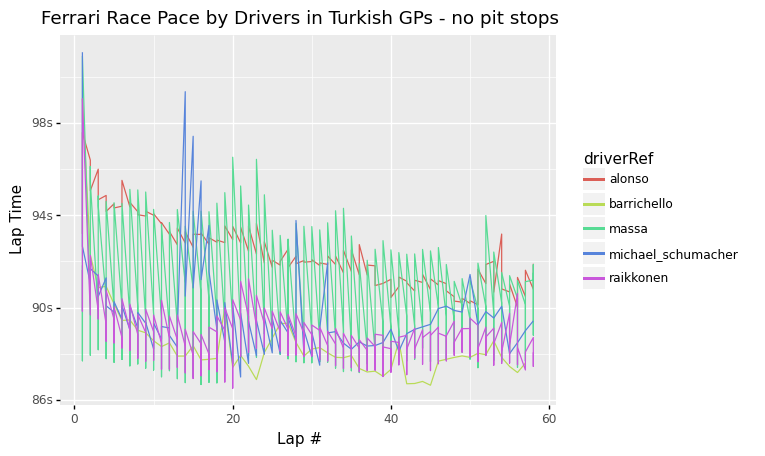

<ggplot: (145939422391)>

In [23]:
ferrari_lap_times = regular_lap_times[regular_lap_times.constructor == "Ferrari"]

(
     ggplot(ferrari_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='Ferrari Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)

Still there is some noise in the data, but that could be looked at based on what happened during the race (e.g. someone going wide)

Let's repear these kids of graphs for other current teams too:
 - McLaren
 - Renault
 - Sauber + BMW Sauber 
 - Williams 
 - Red Bull 
 - Torro Rosso
 - BAR (2005) + Honda (2006-2008) + Brawn (2009) + Mercedes (2010-2011)
 - MF1 (2006) + Spyker MF1 (2007) + Force India (2008-2011)

### McLaren Race Pace Plots <a class="anchor" id="section_2_3"></a>

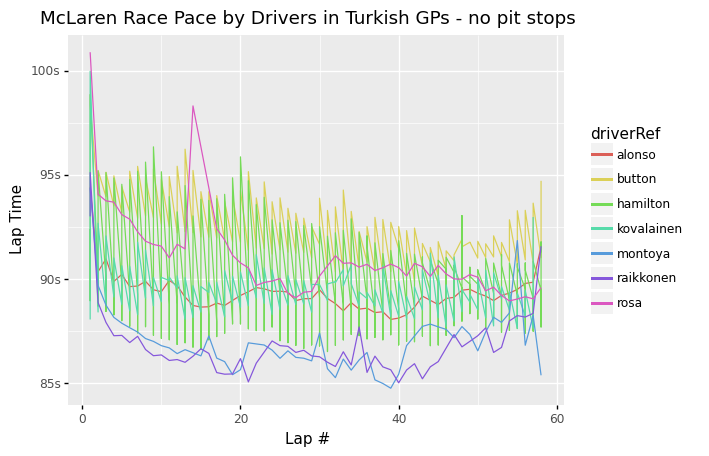

<ggplot: (-9223371890911847564)>

In [24]:
McLaren_lap_times = regular_lap_times[regular_lap_times.constructor == "McLaren"]

(
     ggplot(McLaren_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='McLaren Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)

### Red Bull Race Pace Plots <a class="anchor" id="section_2_4"></a>

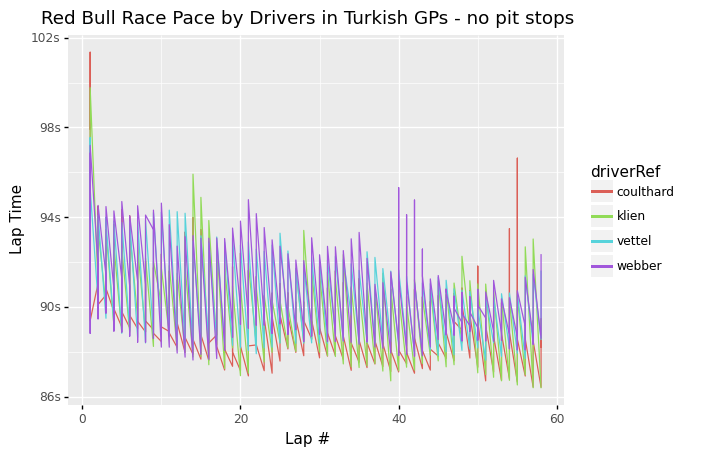

<ggplot: (-9223371890911839109)>

In [25]:
RedBull_lap_times = regular_lap_times[regular_lap_times.constructor == "Red Bull"]

(
     ggplot(RedBull_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='Red Bull Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)

### Renault Race Pace Plots <a class="anchor" id="section_2_5"></a>

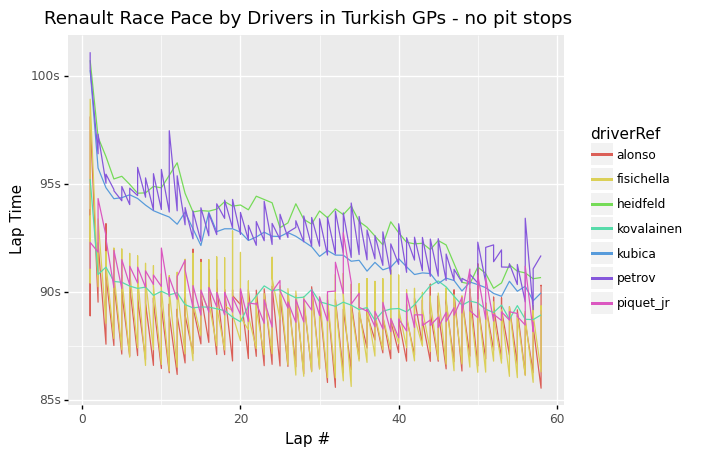

<ggplot: (145942936591)>

In [26]:
renault_lap_times = regular_lap_times[regular_lap_times.constructor == "Renault"]

(
     ggplot(renault_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='Renault Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)

### Williams Race Pace Plots <a class="anchor" id="section_2_6"></a>

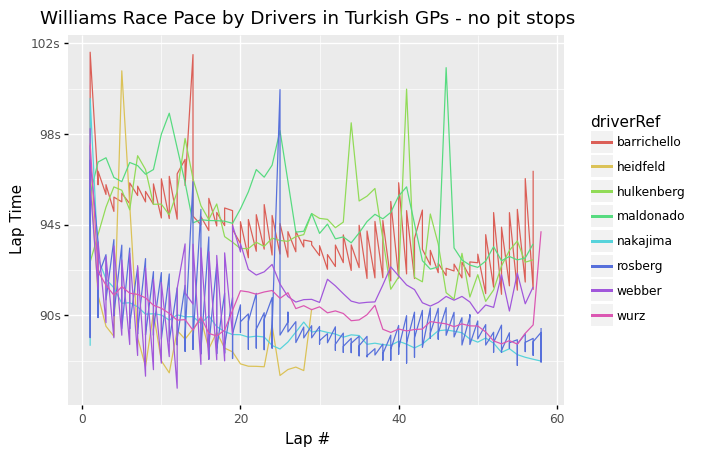

<ggplot: (145942912113)>

In [27]:
williams_lap_times = regular_lap_times[regular_lap_times.constructor == "Williams"]

(
     ggplot(williams_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='Williams Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)

### Toro Rosso Race Pace Plots <a class="anchor" id="section_2_7"></a>

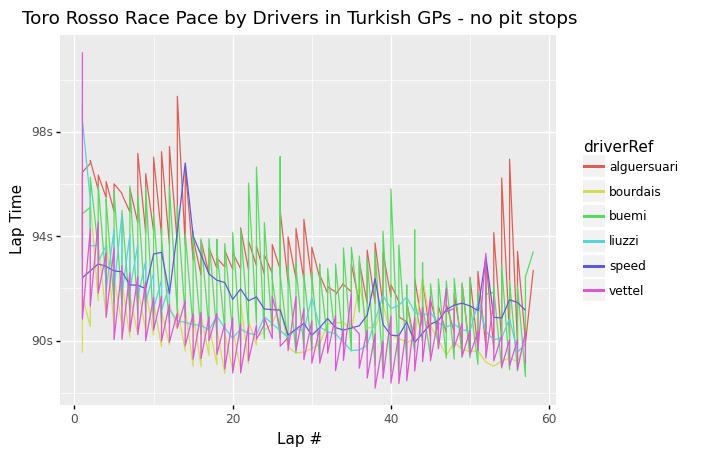

<ggplot: (145942912127)>

In [28]:
toroRosso_lap_times = regular_lap_times[regular_lap_times.constructor == "Toro Rosso"]

(
     ggplot(toroRosso_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='Toro Rosso Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)

### Honda + Brawn + Mercedes Race Pace Plots <a class="anchor" id="section_2_8"></a>

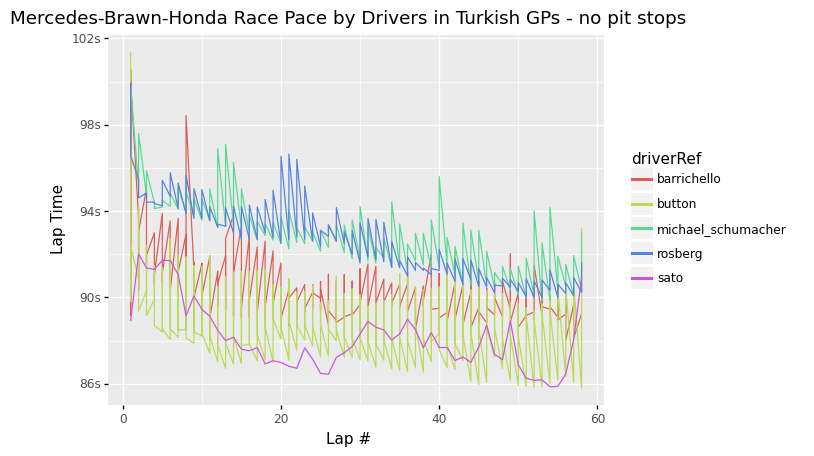

<ggplot: (-9223371890911643879)>

In [29]:
mercedes_lap_times = regular_lap_times[regular_lap_times.constructor.isin(["BAR", "Honda", "Brawn", "Mercedes"])]

(
     ggplot(mercedes_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='Mercedes-Brawn-Honda Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)

### MF1 + Spyker + Force India Race Pace Plots <a class="anchor" id="section_2_9"></a>

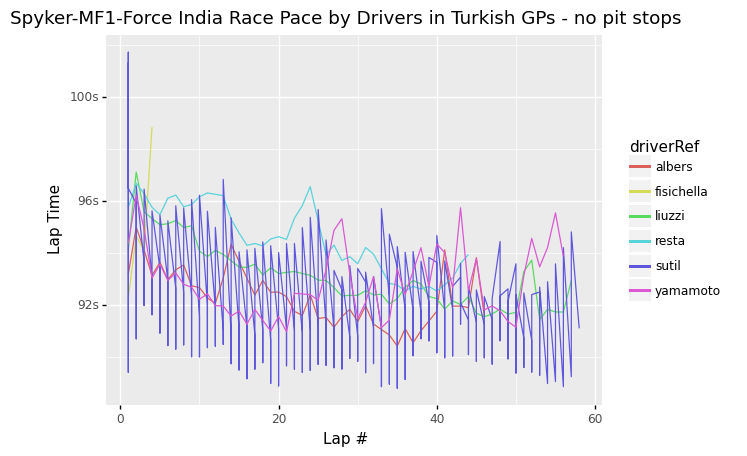

<ggplot: (145943174948)>

In [30]:
forceIndia_lap_times = regular_lap_times[regular_lap_times.constructor.isin(["MF1", "Spyker MF1","Force India"])]

(
     ggplot(forceIndia_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='Spyker-MF1-Force India Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)

### Sauber + BMW Sauber Race Pace Plots <a class="anchor" id="section_2_10"></a>

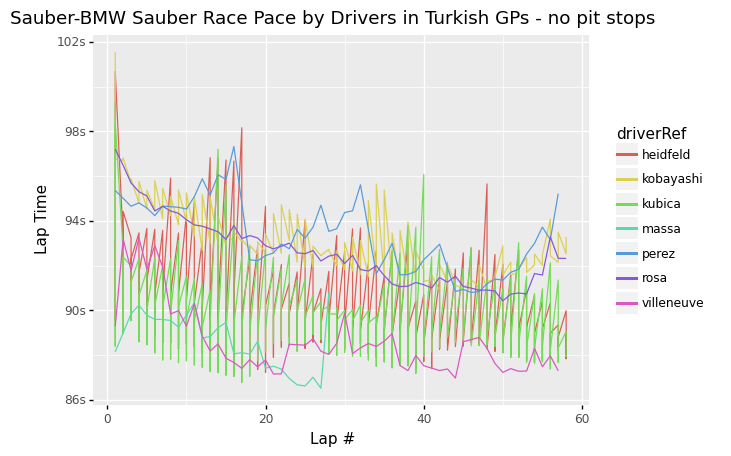

<ggplot: (145943297905)>

In [31]:
sauber_lap_times = regular_lap_times[regular_lap_times.constructor.isin(["Sauber", "BMW Sauber"])]

(
     ggplot(sauber_lap_times)
    + aes(x='lap', y='lap_time', colour = 'driverRef')
    + labs(
        title='Sauber-BMW Sauber Race Pace by Drivers in Turkish GPs - no pit stops', 
        x='Lap #', 
        y='Lap Time',
    )
    + geom_line()
)